In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

In [2]:
lightmap = "C:/_Schule/FHNW/6/GIS/Projekt/FS24_GIS/testing/raster_data/viirs_npp_202300.tif"
cmap_qgis = "C:/_Schule/FHNW/6/GIS/Projekt/FS24_GIS/testing/raster_data/lightpollution_styling2.txt"

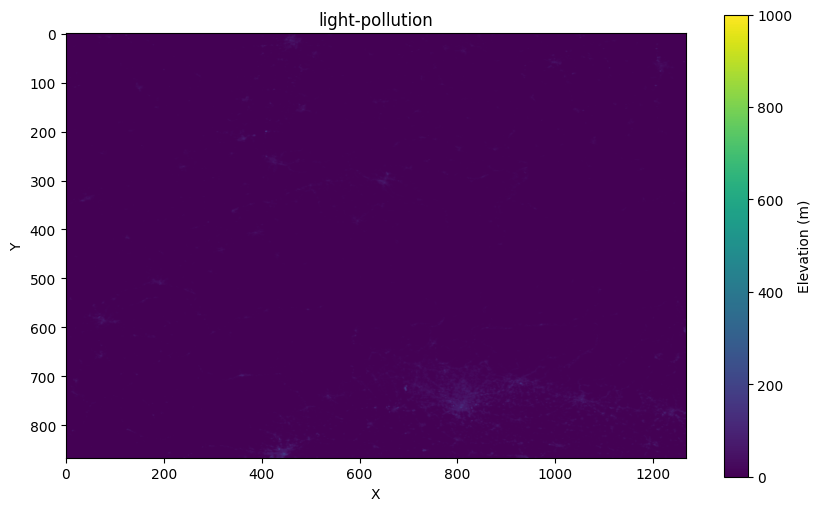

In [3]:
# Open the GeoTIFF file
with rasterio.open(lightmap) as src:
    # Read the raster data
    raster_data = src.read()

    # Display the raster data with custom styling
    plt.figure(figsize=(10, 6))  # Set figure size
    plt.imshow(raster_data[0], cmap='viridis', vmin=0, vmax=1000)  # Example styling
    plt.colorbar(label='Elevation (m)')  # Add colorbar with label
    plt.title('light-pollution')  # Add title
    plt.xlabel('X')  # Add x-axis label
    plt.ylabel('Y')  # Add y-axis label
    plt.grid(False)  # Turn off grid
    plt.show()

In [4]:
# Define function to create custom colormap from QGIS exported text file
def create_custom_colormap(colormap_file):
    colors = []
    with open(colormap_file, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            color = [float(c) for c in parts[:3]]  # Convert to float
            colors.append(color)
    return LinearSegmentedColormap.from_list('custom_colormap', colors)

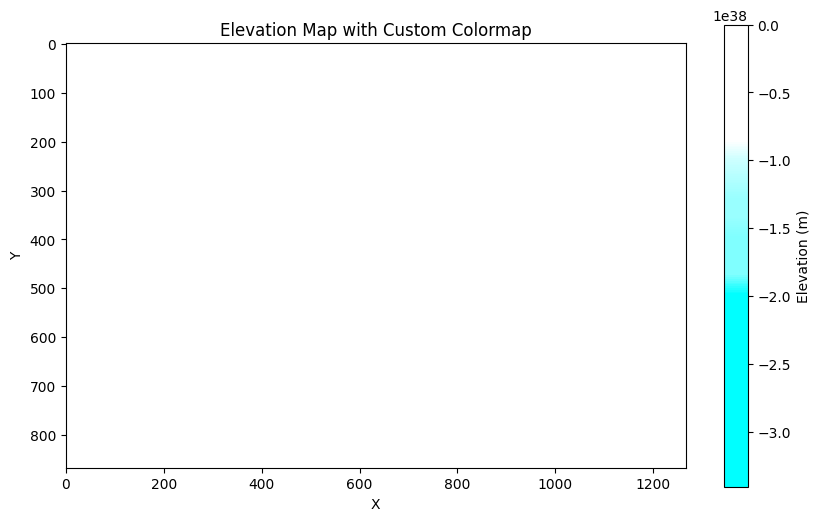

In [5]:
# Open the GeoTIFF file
with rasterio.open(lightmap) as src:
    # Read the raster data
    raster_data = src.read()

    # Create custom colormap from QGIS exported text file
    custom_cmap = create_custom_colormap(cmap_qgis)  # Replace with your colormap file

    # Normalize raster data values
    norm = Normalize(vmin=np.min(raster_data), vmax=np.max(raster_data))

    # Display the raster data with custom colormap and normalization
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data[0], cmap=custom_cmap, norm=norm)
    plt.colorbar(label='Elevation (m)')
    plt.title('Elevation Map with Custom Colormap')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    plt.show()

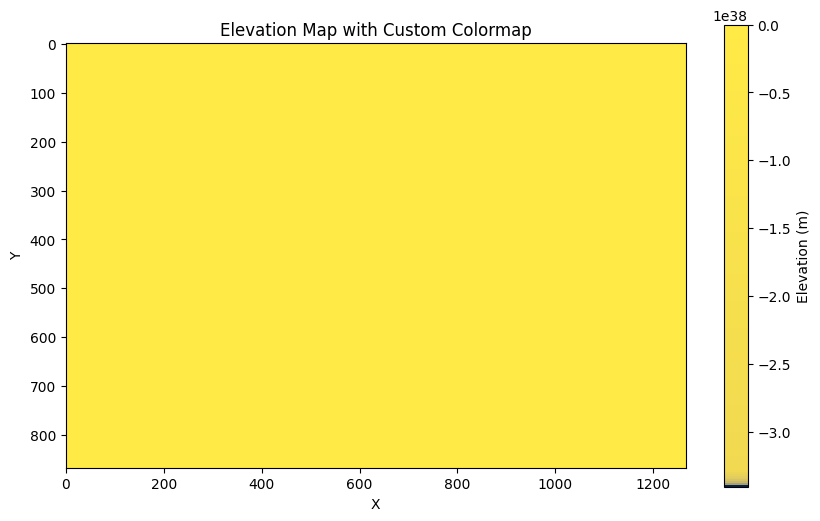

In [6]:
# Define levels and colors
levels = [0, 0.001, 0.005, 0.01, 0.15, 0.5, 0.6, 0.7, 0.9, 1.5, 2.6, 6.4, 200]
colors = ['#00204d', '#36476b', '#4b546c', '#5c616e', '#6d6e72', '#7d7c78', '#8e8a79', '#a19976', '#b4a872',
          '#c7b76b', '#dbc761', '#f1d951', '#ffea46']

# Normalize levels to range [0, 1]
norm = Normalize(vmin=min(levels), vmax=max(levels))
normalized_levels = [(level - min(levels)) / (max(levels) - min(levels)) for level in levels]

# Create custom colormap
custom_colors = [(normalized_levels[i], colors[i]) for i in range(len(levels))]
custom_cmap = LinearSegmentedColormap.from_list('custom_colormap', custom_colors)

# Open the GeoTIFF file
with rasterio.open(lightmap) as src:
    # Read the raster data
    raster_data = src.read()

    # Normalize raster data values
    norm = Normalize(vmin=np.min(raster_data), vmax=np.max(raster_data))

    # Display the raster data with custom colormap and normalization
    plt.figure(figsize=(10, 6))
    plt.imshow(raster_data[0], cmap=custom_cmap, norm=norm)
    plt.colorbar(label='Elevation (m)')
    plt.title('Elevation Map with Custom Colormap')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    plt.show()